# Haberman Survival Data Set Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

Dataset Have 4 features:
* Age of Patient
* Patient year of operation (All in 19')
* Number of Nodes Detected
* Patient Survival Status
    1. Patient survived for 5 years and longer
    2. Patient died within 5 years
    
Objective: To Perform EDA on the basis of survival status with help of 3 featues
    
Here our classes are patient survival status

In [6]:
"""Downloaded Haberman Dataset from https://www.kaggle.com/gilsousa/haberman-s-survival"""

#Load Dataset in pandes DataFrame
hb = pd.read_csv('haberman.csv',header=None,names=['Age','TreatmentYear','NoOfNodes','Survival'])

In [7]:
#Data-point and Features in Haberman Dataset
print(hb.shape)

(306, 4)


In [8]:
#Columns present 
print(hb.columns)

Index(['Age', 'TreatmentYear', 'NoOfNodes', 'Survival'], dtype='object')


In [20]:
hb.describe()

,Age,TreatmentYear,NoOfNodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
#Dataset of each class
print(hb['Survival'].value_counts())

1    225
2     81
Name: Survival, dtype: int64


Clearly, Here we see that with survival status more than 5 year we have 225 entries
but for survival status less than 5 year we have only 81 entries.
Hence, the given dataset in imbalanced

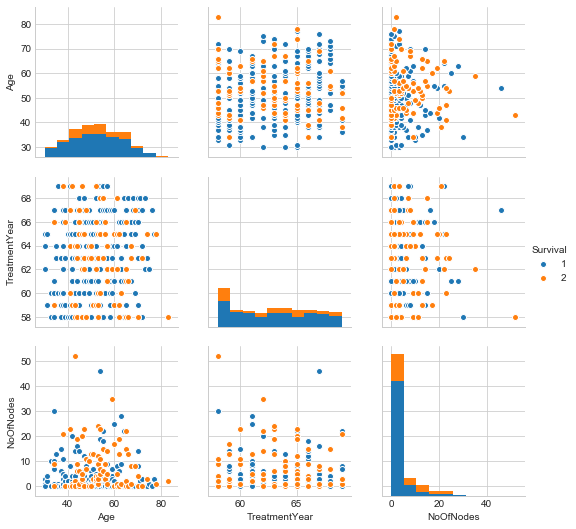

In [10]:
#PairPlot
sns.set_style('whitegrid')
sns.pairplot(hb,hue='Survival',vars=['Age','TreatmentYear','NoOfNodes'])
plt.show()

Observation:
    * All the points are scattered nearby and hence there is overlap between all the two categories
    * Hence we can not catagorise each class with simple if else condition

# Histogram

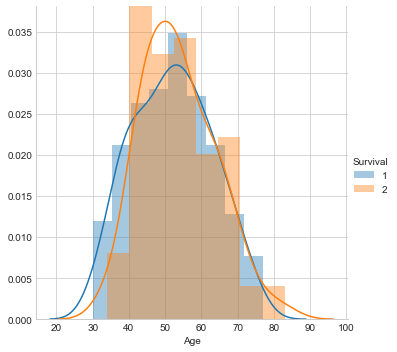

In [11]:
#Distribution Plot for Age
sns.set_style('whitegrid')
sns.FacetGrid(hb,hue='Survival',size=5).map(sns.distplot,'Age').add_legend()
plt.show()

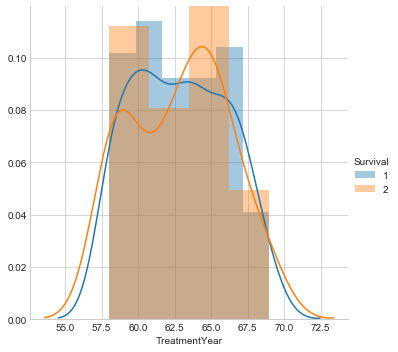

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(hb,hue='Survival',size=5).map(sns.distplot,'TreatmentYear').add_legend()
plt.show()

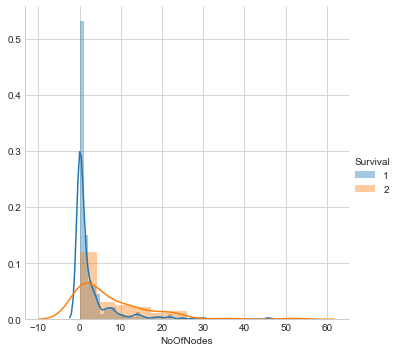

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(hb,hue='Survival',size=5).map(sns.distplot,'NoOfNodes').add_legend()
plt.show()

Observation:
    * With the above distribution plot we are unable to separate the both
      the survival status and there is massive intersection between both classes
    * However with distribution plot of no of nodes we get to know that chances of survial 
      for more than 5 year is higher if no of nodes are less. Hence, axillary nodes is only
      feature which is useful to identify patient survival status

# PDF and CDF

In [39]:
hb_1 = hb[hb['Survival']==1]
hb_2 = hb[hb['Survival']==2]

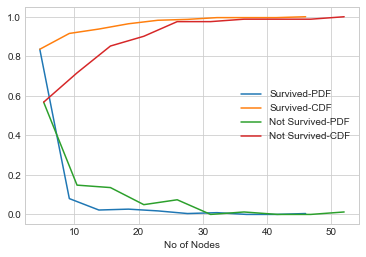

In [40]:
counts,bin_edges = np.histogram(hb_1['NoOfNodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Survived-PDF')
plt.plot(bin_edges[1:],cdf,label='Survived-CDF')

counts,bin_edges = np.histogram(hb_2['NoOfNodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Not Survived-PDF')
plt.plot(bin_edges[1:],cdf,label='Not Survived-CDF')
plt.legend()
plt.xlabel('No of Nodes')
plt.show()

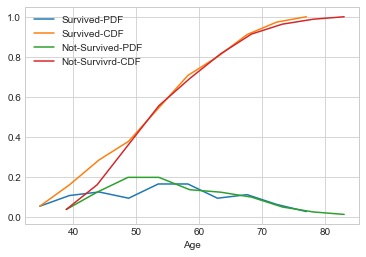

In [42]:
counts,bin_edges = np.histogram(hb_1['Age'],bins=10,density=True)
pdf = counts/sum(counts)
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Survived-PDF')
plt.plot(bin_edges[1:],cdf,label='Survived-CDF')

counts,bin_edges = np.histogram(hb_2['Age'],bins=10,density=True)
pdf = counts/sum(counts)
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Not-Survived-PDF')
plt.plot(bin_edges[1:],cdf,label='Not-Survivrd-CDF')
plt.legend()
plt.xlabel('Age')
plt.show()

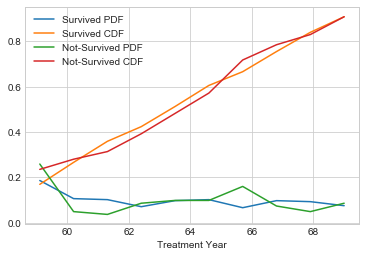

In [47]:
counts,bin_edges = np.histogram(hb_1["TreatmentYear"],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:],pdf,label='Survived PDF')
plt.plot(bin_edges[1:],cdf,label='Survived CDF')

counts,bin_edges = np.histogram(hb_2['TreatmentYear'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:],pdf,label='Not-Survived PDF')
plt.plot(bin_edges[1:],cdf,label='Not-Survived CDF')
plt.legend()
plt.xlabel('Treatment Year')
plt.show()



Observation:
    * CDF and PDF of both treatment year and age have too much overap and these two can't be used
        for classifying survival status
    * But CDf and PDF of no of axillary node is too much useful as we can see clearly that with less
        no of node CDF of survial status is high as compared to CDf of non- survival status

# Boxplot

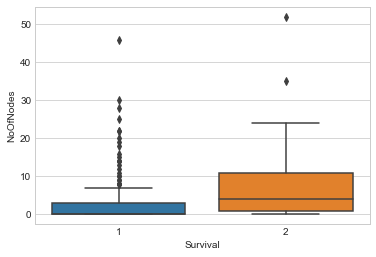

In [17]:
sns.boxplot(x='Survival',y='NoOfNodes',data=hb)
plt.show()

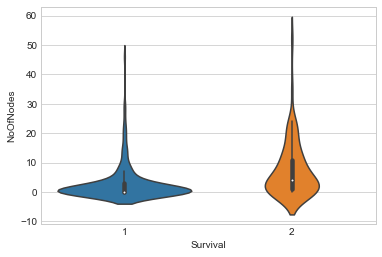

In [19]:
sns.violinplot(x='Survival',y='NoOfNodes',data=hb,size=8)
plt.show()

With Boxplot and violin plot we can say that most of the person who have survived
more than 5 year have zero nodes.
50 percentile of violin and boxplot is at zero for survival for more than 5 years